## Learn Convolution from Scratch
Source: https://www.youtube.com/watch?v=p6tG-dep8f4&t=196s

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

In [2]:
def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray')
    
def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray')

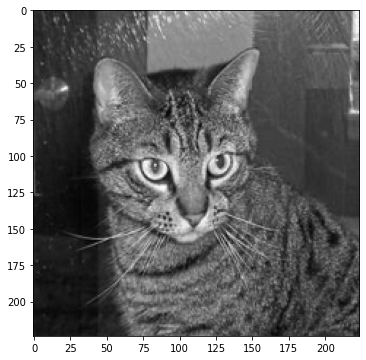

In [3]:
img = Image.open('data/1.jpg')
img = ImageOps.grayscale(img)
img = img.resize(size=(224, 224))
plot_image(img)

In [4]:
sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

blur = np.array([
    [0.0625, 0.125, 0.0625],
    [0.125, 0.25, 0.125],
    [0.0625, 0.125, 0.0625]
])

outline = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

In [5]:
def calculate_target_size(img_size: int, kernel_size: int) -> int:
    num_pixels = 0
    
    for i in range(img_size):
        added = i + kernel_size
        if added <= img_size:
            num_pixels += 1
    
    return num_pixels

In [6]:
calculate_target_size(img_size=224, kernel_size=3)

222

In [7]:
calculate_target_size(img_size=5, kernel_size=3)

3

In [8]:
subset = np.array(img)[0:0+3, 0:0+3]
subset

array([[39, 41, 41],
       [42, 43, 44],
       [45, 44, 44]], dtype=uint8)

In [9]:
np.multiply(subset, sharpen)

array([[  0, -41,   0],
       [-42, 215, -44],
       [  0, -44,   0]])

In [10]:
np.sum(np.multiply(subset, sharpen))

44

In [11]:
def convolve(img: np.array, kernel: np.array) -> np.array:
    tgt_size = calculate_target_size(img_size=img.shape[0], kernel_size=kernel.shape[0])
    k = kernel.shape[0]
    
    convolved_img = np.zeros(shape=(tgt_size, tgt_size))
    
    for i in range(tgt_size):
        for j in range(tgt_size):
            mat = img[i:i+k, j:j+k]
            convolved_img[i, j] = np.sum(np.multiply(mat, kernel))
            
    return convolved_img

In [12]:
img_sharpened = convolve(img=np.array(img), kernel=sharpen)

In [13]:
img_sharpened

array([[ 44.,  48.,  49., ..., 176., 235., 200.],
       [ 46.,  49.,  45., ..., 179., 219., 191.],
       [ 43.,  38.,  37., ..., 177., 210., 200.],
       ...,
       [ 22.,  19.,  14., ...,  20.,  81.,   2.],
       [ 28.,  17.,  14., ...,  23.,  23.,   1.],
       [ 32.,  22.,  18., ..., -23.,  29.,  -1.]])

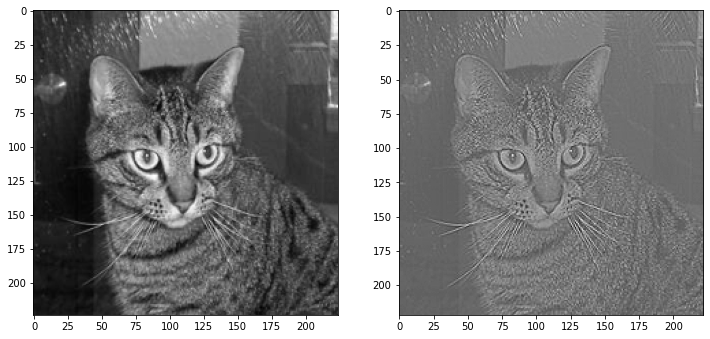

In [14]:
plot_two_images(img1=img, img2=img_sharpened)

In [15]:
def negative_to_zero(img: np.array) -> np.array:
    img = img.copy()
    img[img < 0] = 0
    
    return img

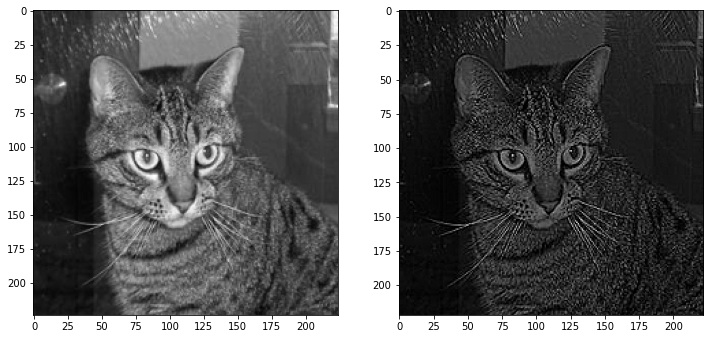

In [16]:
plot_two_images(img1=img, img2=negative_to_zero(img_sharpened))

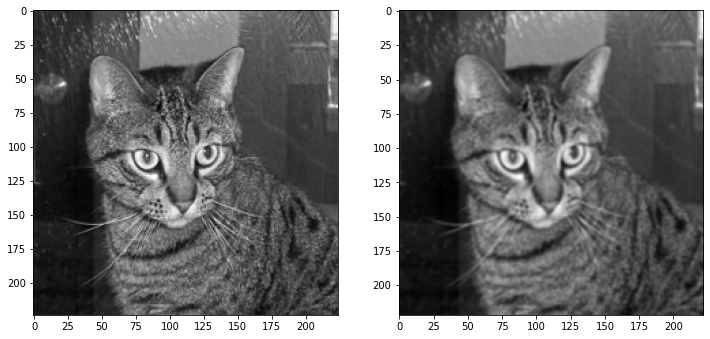

In [17]:
img_blurred = convolve(img=np.array(img), kernel=blur)
plot_two_images(img1=img, img2=img_blurred)

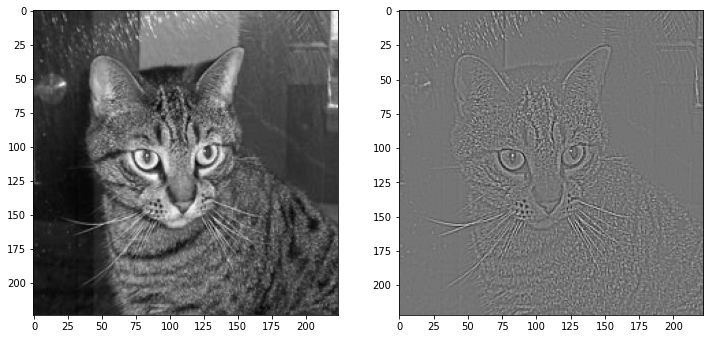

In [18]:
img_outlined = convolve(img=np.array(img), kernel=outline)
plot_two_images(img1=img, img2=img_outlined)

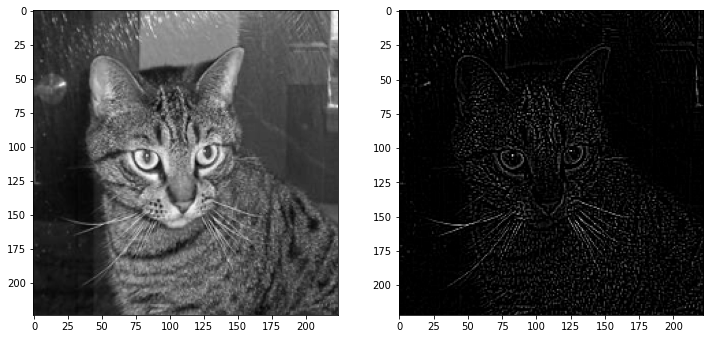

In [19]:
plot_two_images(img1=img, img2=negative_to_zero(img_outlined))

## Add Padding to Convolution

In [20]:
def get_padding_width_per_side(kernel_size: int) -> int:
    return kernel_size // 2

In [21]:
pad_3x3 = get_padding_width_per_side(kernel_size=3)
pad_3x3

1

In [22]:
pad_5x5 = get_padding_width_per_side(kernel_size=5)
pad_5x5

2

In [23]:
def add_padding_to_image(img: np.array, padding_width: int) -> np.array:
    img_with_padding = np.zeros(shape=(img.shape[0] + (padding_width * 2),
                                       img.shape[0] + (padding_width * 2)))
    img_with_padding[padding_width:-padding_width, padding_width:-padding_width] = img
    return img_with_padding

(226, 226)


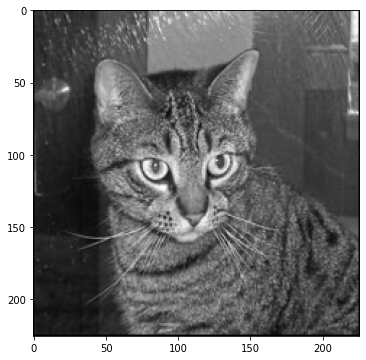

In [24]:
img_with_padding_3x3 = add_padding_to_image(img=np.array(img), padding_width=pad_3x3)

print(img_with_padding_3x3.shape)
plot_image(img_with_padding_3x3)

In [25]:
img_with_padding_3x3

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,  39.,  41., ..., 195., 197.,   0.],
       [  0.,  42.,  43., ..., 197., 195.,   0.],
       ...,
       [  0.,  32.,  28., ...,  29.,  49.,   0.],
       [  0.,  30.,  27., ...,  38.,  32.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

(228, 228)


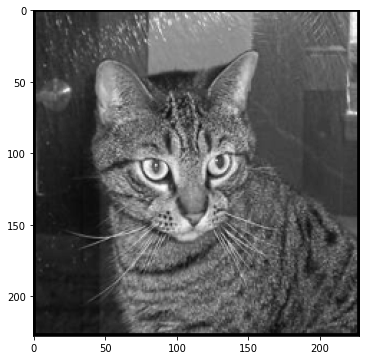

In [26]:
img_with_padding_5x5 = add_padding_to_image(img=np.array(img), padding_width=pad_5x5)

print(img_with_padding_5x5.shape)
plot_image(img_with_padding_5x5)

In [27]:
img_with_padding_5x5

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,  39., ..., 197.,   0.,   0.],
       ...,
       [  0.,   0.,  30., ...,  32.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [28]:
img_padded_3x3_sharpen = convolve(img=img_with_padding_3x3, kernel=sharpen)
img_padded_3x3_sharpen.shape

(224, 224)

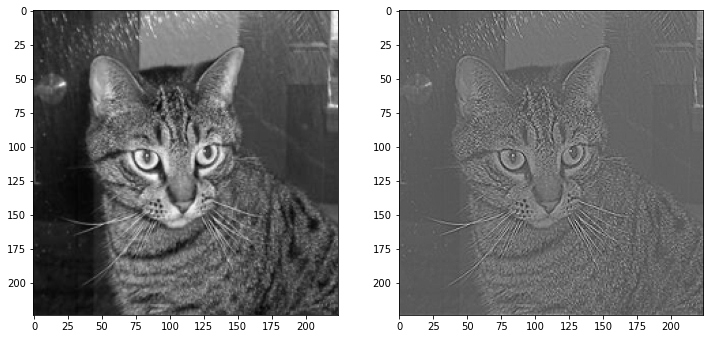

In [29]:
plot_two_images(img1=img, img2=img_padded_3x3_sharpen)